# XCO2 tutorial Outline

XCO2 Tutorial Outline

POWER POINT PORTION

1. Introduction to XCO2

2. What is XCO2 and history

3. What can XCO2 show and not show

4. Plotted example of XCO2

5. Measurement Approach

6. Spatial and Temporal Resolution for OCO-2 and OCO-3

7.How do we know the data is good?

8.Where to download the data

9. Product and Naming

10.Documentation for data products


## JUPYTER NOTEBOOK PORTION

Before following along, you will need to download software packages for this portion of the training. This is also what you will need in order to work with the data. We will be working in python, please make sure to have python 3 installed as well as Jupyter Notebook installed.

Please be sure to have these libraries downloaded as well – (list libraries)

OCO-2 Data files are large so it will take some time to download!

1.	Show what happens when we open up Jupyter Notebook (we will provide a path for the demo)
2.	Show code for how we pull the data from the data (File name, date and geolocation)
3.	Example one – XY Plot of XCO2 variation over time for a given location
4.	Example two- Show same plot but over several years
5.	Example three- Same location and time but shown over Google Earth for OCO-2 data
6.	Example four- Same location and time but show over Google Earth for OCO-3 data
7.	Example five – GIF showing OCO-3 data on spinning globe



# Jupyter notebook installation guide

From the list of website you can follow instructions to setup Jupyter Notebook:
* https://jupyter.org/install
* https://www.geeksforgeeks.org/how-to-install-jupyter-notebook-in-windows/
* https://test-jupyter.readthedocs.io/en/latest/install.html
 

## 1. Show what happens when we open up Jupyter Notebook
### Jupyter Notebook Setup guide

In [6]:
from IPython.display import display, IFrame, HTML, YouTubeVideo

IFrame( src="https://test-jupyter.readthedocs.io/en/latest/install.html",\
              width= 800, height= 500)

# MAC OS setup

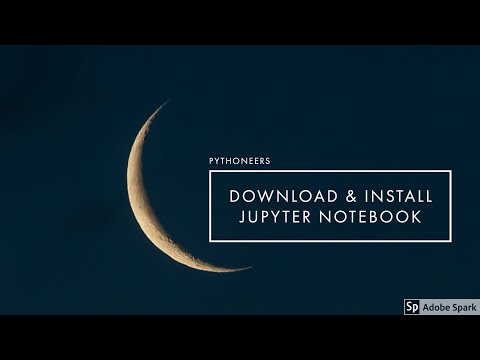

In [7]:
YouTubeVideo('YA8Nq8Tlma4', width= 800, height= 500)

# Libraries (Package Installation Guide)
- Type the following command in the Anaconda prompt:
- Example: //to install netCDF4 library using <b>Anaconda prompt</b>
    * pip install netCDF4
- Second option: To install multiple libraries from the text file
    * pip install -r requirements.txt
  

## Example to download libaries from Anaconda prompt

In [8]:
# To display images
from IPython.display import Image
from google.colab.patches import cv2_imshow


display(Image(url="https://github.com/sagarlimbu0/OCO2-OCO3/blob/main/ARSET_/downloading_BASEMAP_whl/locate_anaconda-prompt.png"))

### Install single and multiple libararies

In [9]:
display(Image(url="https://github.com/sagarlimbu0/OCO2-OCO3/blob/main/ARSET_/downloading_BASEMAP_whl/package_installation.png"))

### Install multiple libraries in a single line

In [10]:
display(Image(url="https://github.com/sagarlimbu0/OCO2-OCO3/blob/main/ARSET_/downloading_BASEMAP_whl//install_multiple_libraries.png"))

### Open jupyter notebook after installing libraries

In [11]:
display(Image(url="https://github.com/sagarlimbu0/OCO2-OCO3/blob/main/ARSET_/downloading_BASEMAP_whl//downloading_BASEMAP_whl/open_notebook.png"))

## Import Libaries

In [12]:
# Libraries to open 'netcdf' file
import netCDF4
import xarray

# To pre-process dataframe and use in visualization
import numpy as np
import pandas as pd


# To create visualization, graphs, and plots
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
#from mpl_toolkits.basemap import Basemap # to create geo-spatial map, requires dependencies installation

import plotly.express as px
#import cartopy.crs as ccrs

# To Display the content
from IPython.display import display, HTML, Image

### Dependecies/ Wheel files download from following packages
- <b>GDAL, Cartopy, basemap </b>
- EG: pip install <b> path to whl file</b> --user
- https://www.lfd.uci.edu/~gohlke/pythonlibs/#basemap

# 2. Show code for how we pull the data from the data (File name, date and geolocation)

- We can download the files from EarthData
- Requires login credentials and we can create a free account

## NOTE: 
- In this tutorial, we will demonstrate by using the OCO2 datasets which in the same path
of the git repository.
- FILE directory name: 'oco2_data'

### 2.a. Using NetCDF library to read the file
- Example:
    * netCDF4.Dataset(<path to file>)

## NOTE: Reading the file from the google drive requires Google authorization
- Below step will allow the authorization to access the drive

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## SINGLE day file

In [14]:
## using the netcdf file from same directory
df_oco2= netCDF4.Dataset("/content/drive/MyDrive/JPL/ARSET/oco2_LtCO2_190101_B10206Ar_200729172616s.nc4")

### Display the content inside file
- variables and attributes

In [15]:
list(df_oco2.variables.keys())

['sounding_id',
 'levels',
 'bands',
 'vertices',
 'footprints',
 'date',
 'latitude',
 'longitude',
 'time',
 'solar_zenith_angle',
 'sensor_zenith_angle',
 'xco2_quality_flag',
 'xco2_qf_bitflag',
 'xco2_qf_simple_bitflag',
 'source_files',
 'file_index',
 'vertex_latitude',
 'vertex_longitude',
 'xco2',
 'xco2_uncertainty',
 'xco2_apriori',
 'pressure_levels',
 'co2_profile_apriori',
 'xco2_averaging_kernel',
 'pressure_weight']

## Creating a dataframe using PANDAS library to retrieve attributes

In [16]:
df_xco2= pd.DataFrame(columns=[ "Latitude", "Longitude", "DateTime","xco2", "xco2_quality_flag"])

df_xco2["xco2"]= df_oco2["xco2"][:]
df_xco2["dateTime"]= df_oco2["time"][:]
df_xco2["latitude"]= df_oco2["latitude"][:]
df_xco2["longitude"]= df_oco2["longitude"][:]
df_xco2["xco2_quality_flag"]= df_oco2["xco2_quality_flag"][:]

## Visualizing the dataset
### using different libraries: Plotly or Basemap

## 1. Plotly
### Setting up Token using Map Box
- Requires map access token to visualize the map
- Create Free acount and generate API Key

- (more brief)

https://account.mapbox.com/

In [17]:
map_token= 'pk.eyJ1Ijoic2FnYXJsaW1idTAiLCJhIjoiY2t2MXhhMm5mNnE5ajJ3dDl2eDZvNTM2NiJ9.1bwmb8HPgFZWwR8kcO5rOA'

# Global Coverage

### Function to visualize the dataset using Plotly


(NOTE): color range fixation

In [18]:
%%time
# Filter XCO2 ppm by max and min XCo2 ppm to reflect the variation
# new_data= df_xco2[df_xco2['xco2'] < max_ppm]
# new_data= new_data[new_data['xco2'] > min_ppm]

# set mapbox access token
px.set_mapbox_access_token(map_token)

# passing Latitude, Longitude, and Xco2 product
# Retrieve all data and passing into function
fig= px.scatter_mapbox(df_xco2,
                      lat= df_xco2['latitude'],
                      lon= df_xco2['longitude'],
                      color= df_xco2['xco2'],        
                       zoom= 0,
                      size_max= 0.25,

                      color_continuous_scale= ["yellow", "orange", "red"]
#                       color_continuous_scale= ["blue", "green", "red"]
#                      hover_name=df_xco2['DateTime']
                      )

fig.update_layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=map_token,
        bearing=0,
        pitch=0,
        zoom=0,
        style="white-bg",
        layers=[{
            "below":'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
        ]
    )
    ,title='OCO2- XCO2, Atmospheric Carbon Dioxide'

)

fig.show()

Output hidden; open in https://colab.research.google.com to view.

# ISSUE: outliers of the xco2 value can offset the color range

In [19]:
print("MAX: ", np.max(df_oco2["xco2"]))
print("MIN: ", np.min(df_oco2["xco2"]))

MAX:  448.14862
MIN:  343.27396


## XCO2 data points reflects outliers:
- High xco2 ppm at some region
- Lower bound xco2 has low point at some region

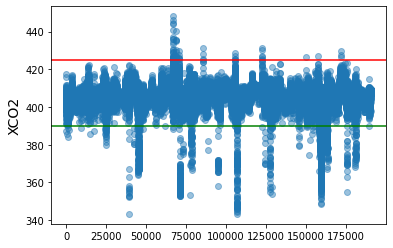

In [20]:
plt.scatter(np.arange(0, len(df_oco2['xco2'][:])), df_oco2['xco2'][:], alpha= 0.45)
plt.ylabel('XCO2', fontsize= 14)
plt.axhline(y= 425, c='r')
plt.axhline(y= 390, c= 'green')


# Filtering the XCO2 values between RANGE (390- 415) to reflect the variation

### Enter the min and max XCO2 ppm

In [21]:
max_ppm= float(input("Enter the UPPER bound XCO2 ppm: "))
min_ppm= float(input("Enter the LOWER bound XCO2 ppm: "))

Enter the UPPER bound XCO2 ppm: 415
Enter the LOWER bound XCO2 ppm: 400


## New visualization after filtering the RANGE of XCO2 ppm to reflect variation

In [22]:
%%time
# Filter XCO2 ppm by max and min XCo2 ppm to reflect the variation
new_data= df_xco2[df_xco2['xco2'] < max_ppm]
new_data= new_data[new_data['xco2'] > min_ppm]

# set mapbox access token
px.set_mapbox_access_token(map_token)

# passing Latitude, Longitude, and Xco2 product
# Retrieve all data and passing into function
fig= px.scatter_mapbox(new_data,
                      lat= new_data['latitude'],
                      lon= new_data['longitude'],
                      color= new_data['xco2'],        
                       zoom= 0,
                      size_max= 0.25,

                      color_continuous_scale= ["yellow", "orange", "red"]
#                       color_continuous_scale= ["blue", "green", "red"]
#                      hover_name=df_xco2['DateTime']
                      )

fig.update_layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=map_token,
        bearing=0,
        pitch=0,
        zoom=0,
        style="white-bg",
        layers=[{
            "below":'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
        ]
    )
    ,title='OCO2- XCO2, Atmospheric Carbon Dioxide'

)

fig.show()

Output hidden; open in https://colab.research.google.com to view.

# Subsetting by geographic bounding box:
- Bounding box coordinates to cover Australia
- Filtering the latitude and longitude by coordinates
- Example filtering the data by Australia region

## Spatial subsetting on the coordinates:
- Latitude(South: North)
- Longitude(West: East)
- Enter the coordinates     
- Example: Subsetting by Australia region
    - latitude: (-45.75 : -9)
    - longitude: (110 : 156)

In [23]:
%%time
def subsetting_coordinates(data, South, North, West, East, zoom = 1, darkmap= 0):
    
    # Create dataframe and columns
    df_xco2= pd.DataFrame(columns=[ "Latitude", "Longitude", "DateTime","xco2", "xco2_quality_flag"])
    
    df_xco2["xco2"]= data["xco2"][:]
    df_xco2["dateTime"]= data["time"][:]
    df_xco2["latitude"]= data["latitude"][:]
    df_xco2["longitude"]= data["longitude"][:]
    df_xco2["xco2_quality_flag"]= data["xco2_quality_flag"][:]

    # Passing the new Dataframe and filtering the coordinates by region/ country: 
    df_first= df_xco2[(df_xco2["latitude"] > South) &(df_xco2["latitude"]< North)]
    df_second= df_first[(df_first["longitude"] >West) & (df_first["longitude"] < East)]
    
    
    # set token
    px.set_mapbox_access_token(map_token)

    fig_second= px.scatter_mapbox(df_second,
                          lat= 'latitude',
                          lon= 'longitude',
                          color= 'xco2',
                          zoom= zoom,
                          size_max= 15,
                          color_continuous_scale= ["yellow", "orange", "red"]
                          )

    if darkmap == 1:
        fig_second.update_layout(
        mapbox_style="dark",
        title='OCO2- XCO2, Atmospheric Carbon Dioxide'

        )
    else:
        fig_second.update_layout(
        mapbox_style="stamen-watercolor",
        title='OCO2- XCO2, Atmospheric Carbon Dioxide'

        )

    fig_second.show()

CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 13.8 µs


### Australia coordinates: 

* latitude: (-45.75 : -9)
* longitude: (110 : 156)

In [24]:
%%time
subsetting_coordinates(df_oco2, -45.75, -9, 110, 156, zoom= 2)

CPU times: user 218 ms, sys: 7.14 ms, total: 225 ms
Wall time: 237 ms


### Example: California:
- latitude: (32, 42)
- longitude: (-125.22 , -118)

#### option: Select Dark map option, 'darkmap = 1'

In [25]:
subsetting_coordinates(df_oco2, 32,  42, -125.22, -118, zoom= 4, darkmap= 1)